# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-06-13 downloaded.
kospi200_prices_250613.csv saved
df_prices updated
Execution time of download: 29 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-06-13 downloaded.
etfs_weather_250613.csv saved
df_prices updated
Execution time of download: 2 mins


In [13]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [6]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

24 securities from 2023-03-29 to 2025-06-12 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [7]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [8]:
# FISA
tickers = tickers + ['K55363DD7958']
len(tickers)

25

In [9]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
24 tickers set to download


100%|███████████████████████████████████████████████████████████████| 24/24 [00:45<00:00,  1.92s/it]

... done
24 securities from 2023-03-29 to 2025-06-13 downloaded.
funds_prices_250613.csv saved
df_prices updated
Execution time of download: 46 secs


In [22]:
#_ = fund.save()

In [16]:
#fund.portfolio_data['universe']

### Master

In [110]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210BR6654,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6480,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6522,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105BC8507,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55105BC8523,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ce,삼성증권,일반,삼성,주식혼합,TDF,글로벌


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [106]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [107]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

8

In [108]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [109]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.91it/s]


5.1 secs elapsed, 0.1 secs paused (2.0%)


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.77it/s]

0.8 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250514.csv saved


### Monthly

In [111]:
fund = PM.create_universe('UV_FNDM')

315 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [114]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [115]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250501.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
ERROR: 8 tickers missing cost data


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [116]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
Master data for 323 funds loaded.
Cost data transaction_cost_250501.csv loaded
Cost data saved to transaction_cost_250514.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

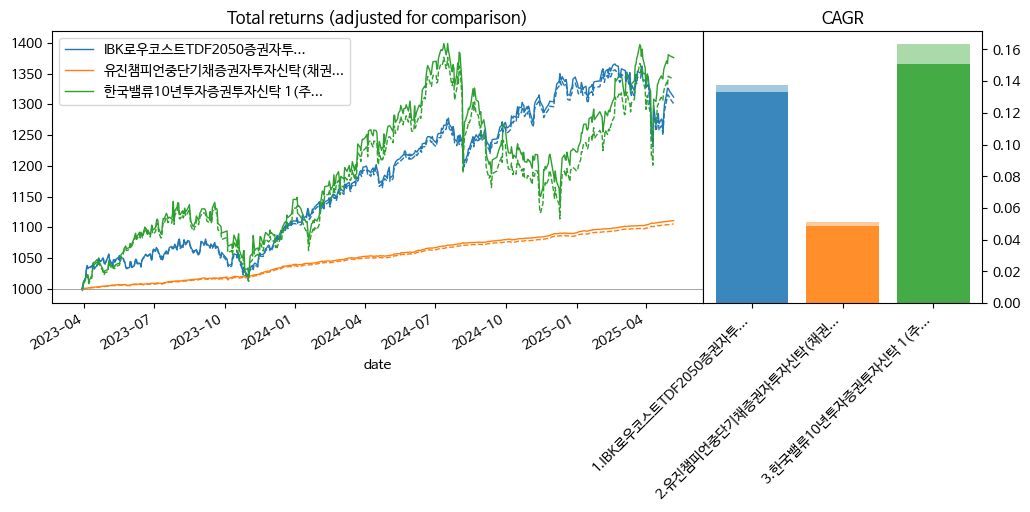

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## LIQ

In [13]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [14]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded


In [15]:
#liq.get_names()

In [16]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.22it/s]

3.9 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-05-27 downloaded.
krx_liq_prices_250527.csv saved
df_prices updated
Execution time of download: 6 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [8]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [14:25<00:00,  4.33s/it]


14.4 mins elapsed, 32.0 secs paused (3.7%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 downloaded
kospi200_ratios_250509.csv saved


In [9]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [10]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-09
Price: 2022-01-03 ~ 2025-05-09


# Performance

In [26]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR, SRT


In [27]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per2_250509.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [28]:
#pm.load('LIQ')
pm.load(pf_srt, pf_sds)

SRT: imported
SDS: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


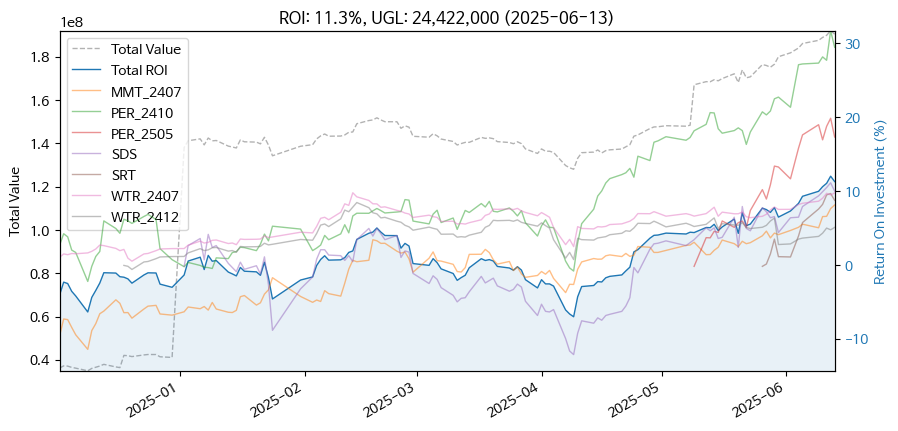

In [29]:
start_date='2024-12-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [30]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [31]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18
end,2025-06-13,2025-06-13,2025-06-13,2025-06-13,2025-06-13,2025-06-13,2025-06-13,2025-06-13
buy,"61,756,350","16,472,520","17,985,321","97,106,466","2,138,730","10,364,836","10,516,562","216,340,786"
sell,"46,784,778","2,617,050",0.0,0.0,0.0,"942,797",0.0,"50,344,625"
value,"19,982,801","18,709,803","21,100,926","106,815,581","2,325,882","10,432,010","11,051,467","190,418,470"
ugl,"5,011,228","4,854,333","3,115,605","9,709,115","187,152","1,009,972","534,905","24,422,309"
roi,0.0811,0.295,0.173,0.1,0.0875,0.0974,0.0509,0.113


Custom category loaded: portfolio2


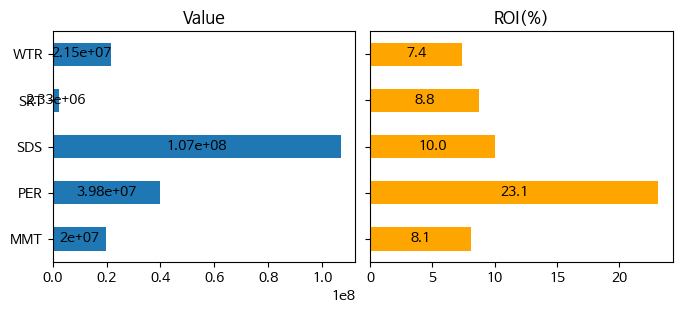

In [32]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*print summary for google sheet 금융자산운용*

In [8]:
pm.util_print_summary(date=w_date.value)

2025-06-02, MMT, 2407, , , , 평가, , 61756350, 46784778, 17855971, 2884398, 0.0467
2025-06-02, PER, 2410, , , , 평가, , 12249374, 2617050, 10504989, 872665, 0.0712
2025-06-02, PER, 2505, , , , 평가, , 16292303, 0.0, 17685183, 1392880, 0.0855
2025-06-02, SRT, , , , 평가, , 2138820, 0.0, 2165987, 27167, 0.0127
2025-06-02, WTR, 2407, , , , 평가, , 10364836, 942797, 10202619, 780581, 0.0753
2025-06-02, WTR, 2412, , , , 평가, , 10516562, 0.0, 10816338, 299776, 0.0285


### All Funds

In [33]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [34]:
start_date='2024-07-01'
#pm.plot(start_date=start_date, roi=False)

In [35]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-06-13,2025-06-13,2025-06-13,2025-06-13,2025-06-13
buy,"31,176,035","9,990,000","10,652,630","48,148,612","99,967,277"
sell,"-14,151",0.0,"-3,481","-103,069","-120,702"
value,"31,949,477","10,326,001","10,729,423","48,099,481","101,104,382"
ugl,"759,291","336,001","73,312","-152,200","1,016,403"
roi,0.0244,0.0336,0.00688,-0.00316,0.0102


In [7]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')

Custom category loaded: account, asset, manager, region, seller, strategy


In [36]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)

Custom category loaded: name2


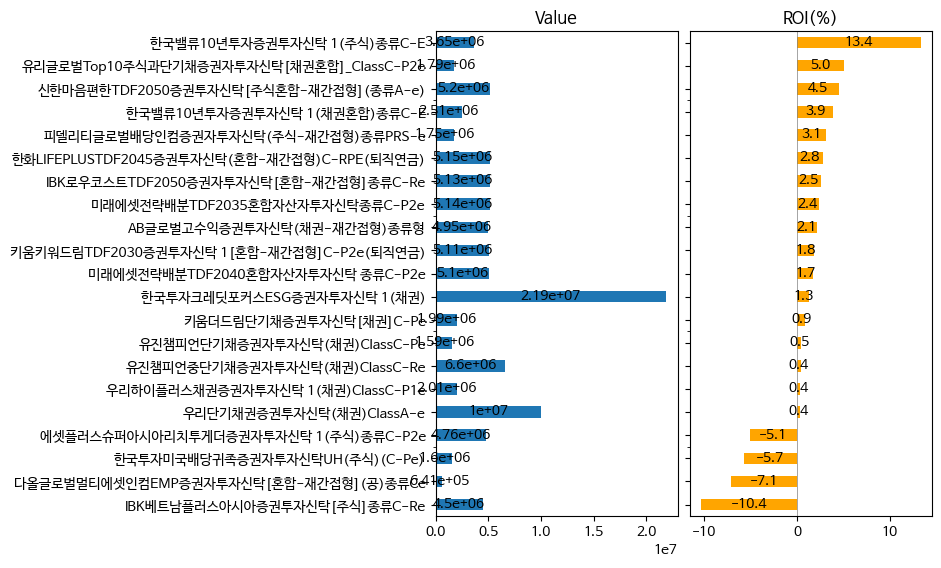

In [37]:
category = 'name2'
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Transaction

## MMT

In [4]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded


In [5]:
# run after editting record file
update = False
#update = True
pf_mmt.update_record() if update else None

In [6]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2025-04-16 000150         두산  0.994485     -2448000        0     0.0    0.000   
           003230       삼양식품  1.000000            0  2796000     0.2    0.196   
           012450  한화에어로스페이스  1.000000      -787999  2364000     0.2    0.165   
           042660       한화오션  0.989757      -468600  3045900     0.2    0.213   
           064350       현대로템  0.967033      -436800  3166800     0.2    0.222   
           329180    HD현대중공업  0.969780      2912000  2912000     0.2    0.204   
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2    0.180   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2    0.204   
           042660       한화오션  0.988336       244350  3420900     0.2    0.208   
           064350       현대로템  0.981914       113350  3400500     0.2    0.206   
           329180    HD현대중공업  1.000000            0  3332000     0.2    0.202   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

*daily transactions for book keeping*

In [7]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

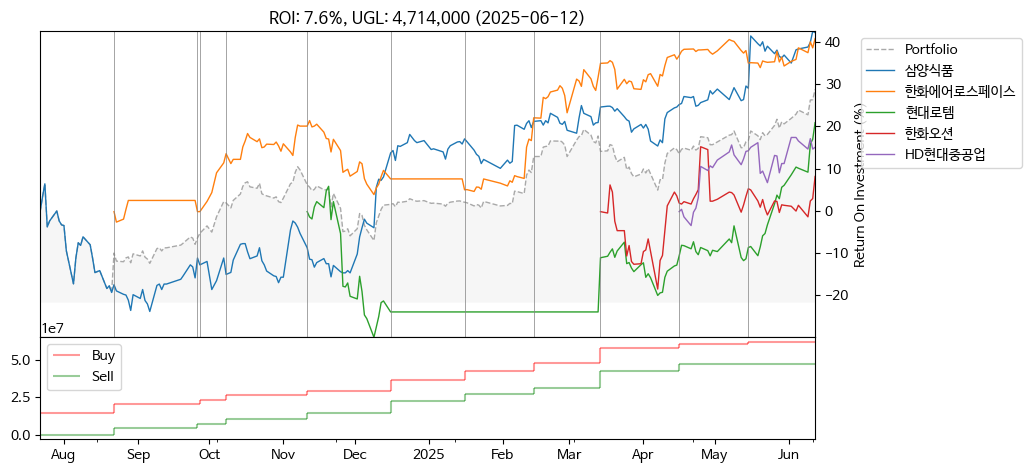

In [8]:
pf_mmt.plot(total=False)

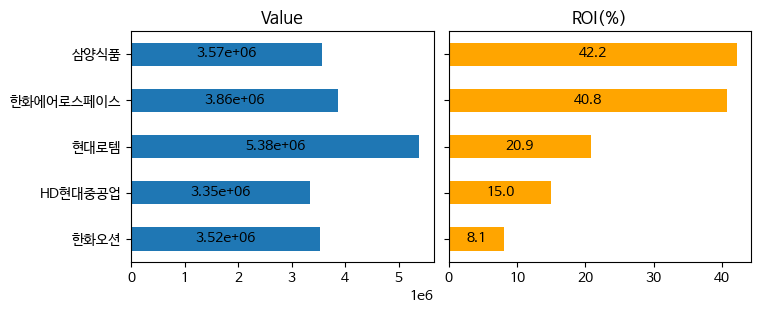

In [9]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

In [10]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-06-12, 61756350, 46784778, 19685272, 4713699, 0.0763


start    2024-07-22
end      2025-06-12
buy      61,756,350
sell     46,784,778
value    19,685,272
ugl       4,713,699
roi          0.0763
dtype: object

In [11]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [12]:
date_actual = '2025-06-17'
capital = WidgetTransaction.values(1)
#capital = 0.12
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-06-05 to 2025-06-05
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 1 %
Residual cash: 660,101
ROI: 6.7%, UGL: 4,699,099 (2025-06-12)
Set save=True to save transaction record


In [13]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-05-15 003230       삼양식품   991000            0    3     0.2    0.180   
           012450  한화에어로스페이스   826168            1    4     0.2    0.204   
           042660       한화오션    81450            3   42     0.2    0.208   
           064350       현대로템   113350            1   30     0.2    0.206   
           329180    HD현대중공업   416500            0    8     0.2    0.202   
2025-06-12 000880         한화    94300           41   41     0.2    0.203   
           003230       삼양식품  1192000           -3    0     0.0    0.000   
           010620     HD현대미포   182600           21   21     0.2    0.201   
           012450  한화에어로스페이스   953000            0    4     0.2    0.200   
           042660       한화오션    84000          -42    0     0.0    0.000   
           064350       현대로템   179700           -9   21     0.2    0.198   
           329180    HD현대중공업   419500            1    9     0.2    0.198   

                       date*  
date       ticker             
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16  
2025-06-12 000880 2025-06-17  
           003230 2025-06-17  
           010620 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [14]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [15]:
pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
#pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [16]:
# run after editting record file
#pf_per.update_record()

In [17]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.035   
           003030   세아제강지주  193300           -4    2    0.05    0.028   
           009970  영원무역홀딩스   85700           -6    5    0.05    0.031   
           016380     KG스틸    1012         -508  495    0.05    0.036   
           047040     대우건설    3635         -127  140    0.05    0.037   
           088350     한화생명    2865          180  180    0.05    0.037   
           078930       GS   41600           12   12    0.05    0.036   
           111770     영원무역   40150           12   12    0.05    0.035   
           139130  DGB금융지주    8250           63   63    0.05    0.038   
           005830   DB손해보험  106900            4    4    0.05    0.031   
           001450     현대해상   29750           17   17    0.05    0.037   
           009900     명신산업     991          500  500    0.05    0.036   
           241560     두산밥캣   40000           13   13    0.05    0.038   
           000270       기아   93600            5    5    0.05    0.034   
           024110     기업은행   14570           35   35    0.05    0.037   
           005850      에스엘   31350           16   16    0.05    0.036   
           316140   우리금융지주   16080           32   32    0.05    0.037   
           138930  BNK금융지주    9430           55   55    0.05    0.037   
           005380      현대차  209500            2    2    0.05    0.030   
           017800   현대엘리베이   46400          100  100     NaN    0.335   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [18]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-06-12, 16472520, 2617050, 19077155, 5221685, 0.317


start    2024-10-17
end      2025-06-12
buy      16,472,520
sell      2,617,050
value    19,077,155
ugl       5,221,685
roi           0.317
dtype: object

In [36]:
#pf_per.update_record()
#pf_per.view_record(-2)

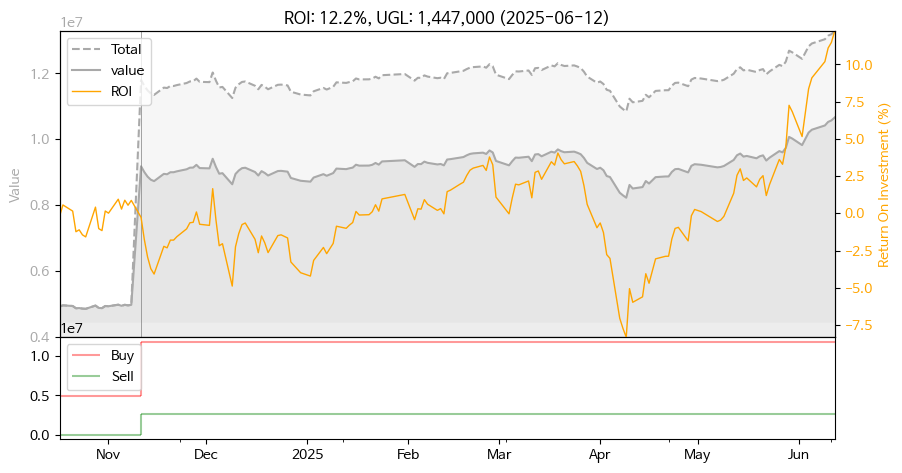

In [23]:
pf_per.plot()

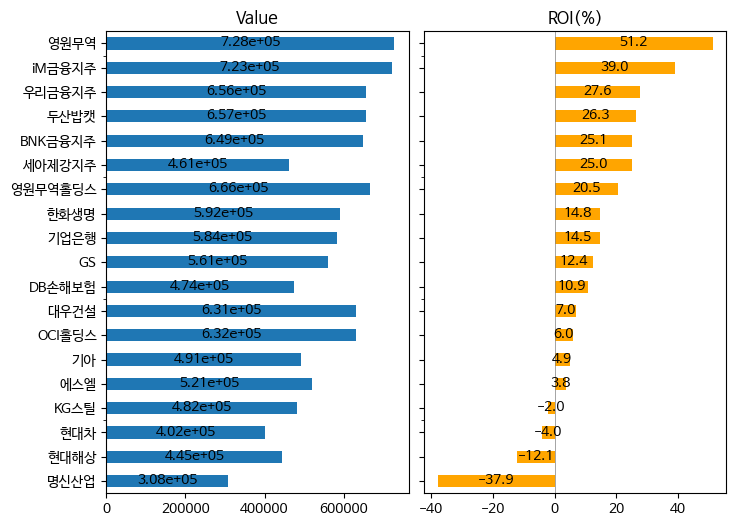

In [24]:
_ = pf_per.plot_assets(figsize=(8,6))

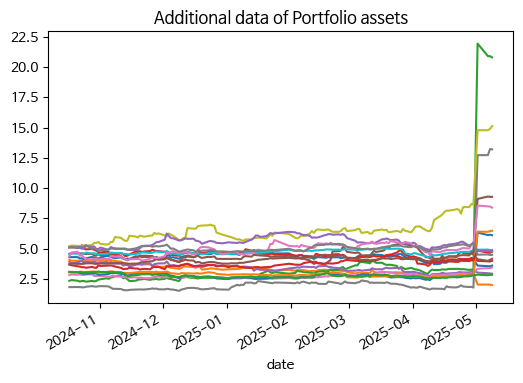

In [12]:
_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [13]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

In [38]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-10 to 2025-05-09
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 2 %
ROI: -0.2%, UGL: -29,615 (2025-05-09)
All transactions saved to pf_k200_per2_250509.csv


In [25]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-06-12 000270       기아   98400            0    5    0.05    0.046   
           001450     현대해상   26200            0   17    0.05    0.042   
           003030   세아제강지주  231000            0    2    0.05    0.043   
           005380      현대차  201500            0    2    0.05    0.038   
           005830   DB손해보험  118800            0    4    0.05    0.044   
           005850      에스엘   32600            0   16    0.05    0.049   
           009900     명신산업     617            0  500    0.05    0.029   
           009970  영원무역홀딩스  133500            0    5    0.05    0.062   
           010060   OCI홀딩스   79100            0    8    0.05    0.059   
           016380     KG스틸     977            0  495    0.05    0.045   
           024110     기업은행   16720            0   35    0.05    0.055   
           047040     대우건설    4515            0  140    0.05    0.059   
           078930       GS   46850            0   12    0.05    0.053   
           088350     한화생명    3295            0  180    0.05    0.056   
           111770     영원무역   60800            0   12    0.05    0.068   
           138930  BNK금융지주   11820            0   55    0.05    0.061   
           139130  DGB금융지주   11490            0   63    0.05    0.068   
           241560     두산밥캣   50600            0   13    0.05    0.062   
           316140   우리금융지주   20550            0   32    0.05    0.062   

                       date*  
date       ticker             
2025-06-12 000270 2025-06-12  
           001450 2025-06-12  
           003030 2025-06-12  
           005380 2025-06-12  
           005830 2025-06-12  
           005850 2025-06-12  
           009900 2025-06-12  
           009970 2025-06-12  
           010060 2025-06-12  
           016380 2025-06-12  
           024110 2025-06-12  
           047040 2025-06-12  
           078930 2025-06-12  
           088350 2025-06-12  
           111770 2025-06-12  
           138930 2025-06-12  
           139130 2025-06-12  
           241560 2025-06-12  
           316140 2025-06-12

*compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*performance without old assets*

In [22]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

Trading of assets 017800 to halt
Updated with transaction on 2025-06-12
Set save=True to save transaction record
ROI: 12.2%, UGL: 1,447,301 (2025-06-12)


start    2024-10-17
end      2025-06-12
buy      11,832,689
sell      2,617,050
value    10,662,940
ugl       1,447,301
roi           0.122
dtype: object

## WTR
*modified all weather*

In [26]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-02'

In [27]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr_static_250213.csv loaded


In [6]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [7]:
pf_wtr.view_record(-2, nshares=False)

name     ratio  transaction      net  \
date       ticker                                                         
2024-11-20 069500             KODEX 200  1.000000       231070  1617490   
           148070          KOSEF 국고채10년  0.999744      -117035  1521455   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1607410   
           284430        KODEX 200미국채혼합  0.999603        62925  1623464   
           379800      KODEX 미국S&P500TR  1.001064      -150320  1615940   
           411060            ACE KRX금현물  1.004401      -170400  1635840   
2025-02-13 069500             KODEX 200  0.991447        52641  1758990   
           148070         KIWOOM 국고채10년  0.997349       177132  1725450   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1639750   
           284430        KODEX 200미국채혼합  0.995416        65450  1754060   
           379800        KODEX 미국S&P500  0.992332        20215  1758705   
           411060            ACE KRX금현물  0.959900      -505365  1804875   

                   weight  weight*      date*  
date       ticker                              
2024-11-20 069500  0.1670    0.168 2024-11-20  
           148070  0.1670    0.158 2024-11-20  
           273130  0.1670    0.167 2024-11-20  
           284430  0.1670    0.169 2024-11-20  
           379800  0.1670    0.168 2024-11-20  
           411060  0.1670    0.170 2024-11-20  
2025-02-13 069500  0.1667    0.168 2025-02-14  
           148070  0.1667    0.165 2025-02-14  
           273130  0.1667    0.157 2025-02-14  
           284430  0.1667    0.168 2025-02-14  
           379800  0.1667    0.168 2025-02-14  
           411060  0.1667    0.173 2025-02-14

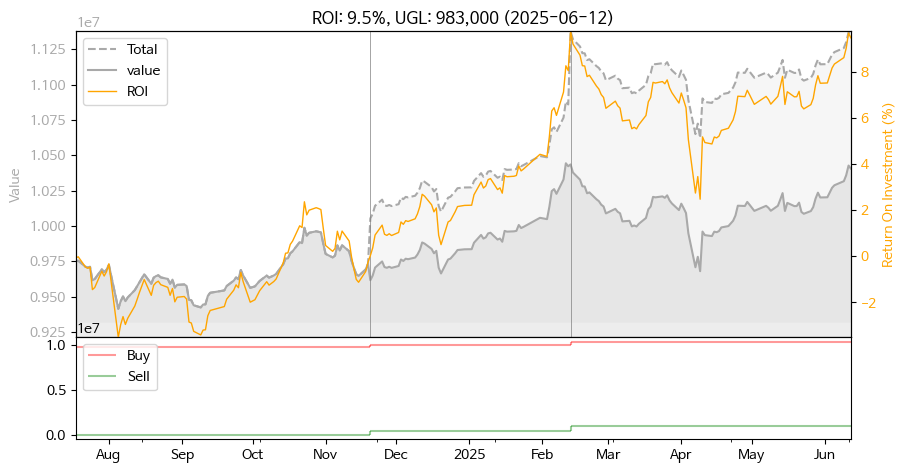

In [28]:
pf_wtr.plot(total=True)

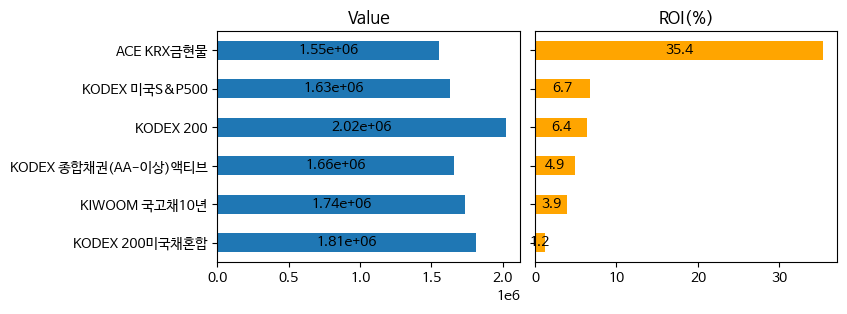

In [29]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [42]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-12-18, 2025-06-02, 10516562, 0.0, 10816341, 299779, 0.0285


start    2024-12-18
end      2025-06-02
buy      10,516,562
sell            0.0
value    10,816,341
ugl         299,779
roi          0.0285
dtype: object

In [36]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [37]:
#pf_wtr.performance(metrics=METRICS)

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
#capital = WidgetTransaction.values(1)
capital = 0.8
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

In [12]:
pf_wtr.view_record(-2, nshares=False)

name     ratio  transaction      net  \
date       ticker                                                         
2025-02-13 069500             KODEX 200  0.991447        52641  1758990   
           148070         KIWOOM 국고채10년  0.997349       177132  1725450   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1639750   
           284430        KODEX 200미국채혼합  0.995416        65450  1754060   
           379800        KODEX 미국S&P500  0.992332        20215  1758705   
           411060            ACE KRX금현물  0.959900      -505365  1804875   
2025-06-04 069500             KODEX 200  1.000000      1164626  3082620   
           148070         KIWOOM 국고채10년  1.000000      1272041  3006640   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000      1417920  3072160   
           284430        KODEX 200미국채혼합  1.000000      1301930  3082120   
           379800        KODEX 미국S&P500  1.000000      1434896  3066800   
           411060            ACE KRX금현물  1.000000      1516211  3073960   

                   weight  weight*      date*  
date       ticker                              
2025-02-13 069500  0.1667    0.168 2025-02-14  
           148070  0.1667    0.165 2025-02-14  
           273130  0.1667    0.157 2025-02-14  
           284430  0.1667    0.168 2025-02-14  
           379800  0.1667    0.168 2025-02-14  
           411060  0.1667    0.173 2025-02-14  
2025-06-04 069500  0.1667    0.168 2025-08-14  
           148070  0.1667    0.164 2025-08-14  
           273130  0.1667    0.167 2025-08-14  
           284430  0.1667    0.168 2025-08-14  
           379800  0.1667    0.167 2025-08-14  
           411060  0.1667    0.167 2025-08-14

In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [24]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='WTR',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_srt_static_250602.csv loaded


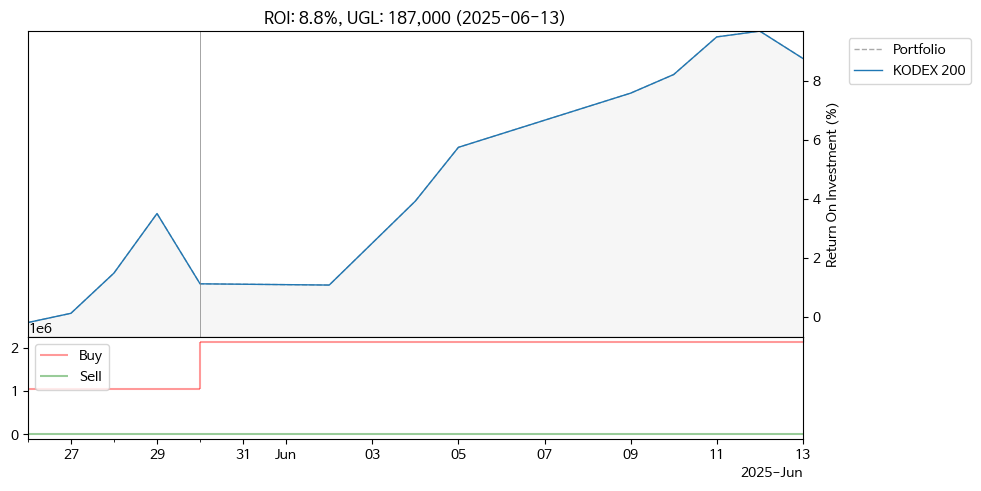

In [25]:
pf_srt.plot(total=False)

In [6]:
pf_srt.valuate()

start    2025-05-26
end      2025-06-09
buy       2,138,730
sell            0.0
value     2,300,747
ugl         162,017
roi          0.0758
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
date_actual = '2025-06-02'
kw = dict(
    buy = {'069500': 1082460}, 
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual = date_actual,
)
_ = pf_srt.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-02
All transactions saved to pf_srt_static_250602.csv
ROI: 1.1%, UGL: 24,074 (2025-06-02)


In [21]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-26,069500,KODEX 200,35190,30,30,1.0,1.0,2025-05-27
2025-05-30,069500,KODEX 200,36140,30,60,1.0,1.0,2025-06-02


## SDS

In [22]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='WTR',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-06-13 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_sds_static_250609.csv loaded


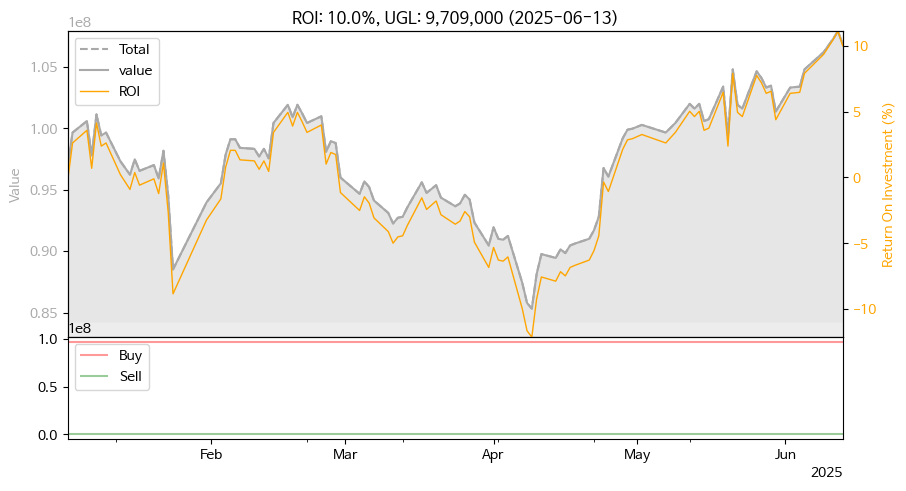

In [23]:
pf_sds.plot()

In [24]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [36]:
#capital = {'018260': 97110000} # = 780 * price on 2025-01-02
capital = {'018260': -20000000} # test sell

kw = dict(
    capital = capital,
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-11 to 2025-06-11
Weights of tickers determined by Specified.
Rebalancing with residual 20,000,000
Mean absolute error of weights: 0 %
Residual cash: 20,118,800
ROI: 0.8%, UGL: 895,309 (2025-06-11)
Set save=True to save transaction record


In [37]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-09,018260,삼성에스디에스,136400,780,780,1.0,1.0,2025-01-01
2025-06-11,018260,삼성에스디에스,137800,-146,634,1.0,1.0,2025-06-11


## LIQ

In [28]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_liq_static_250526.csv loaded


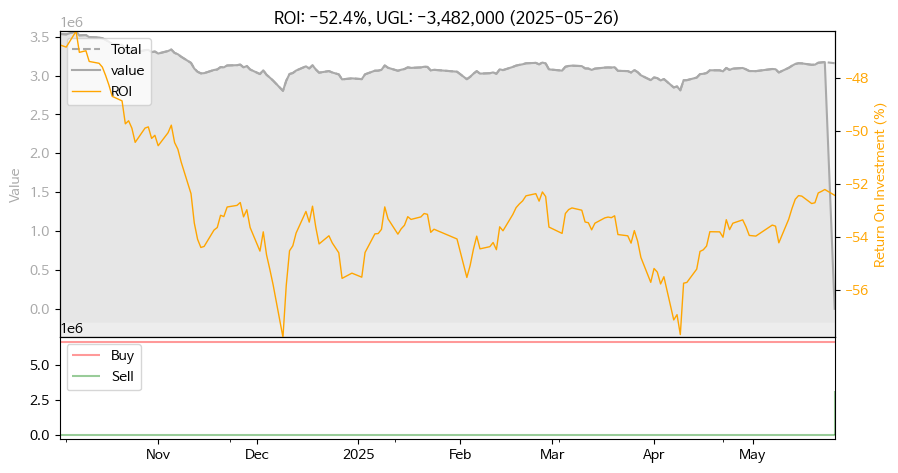

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

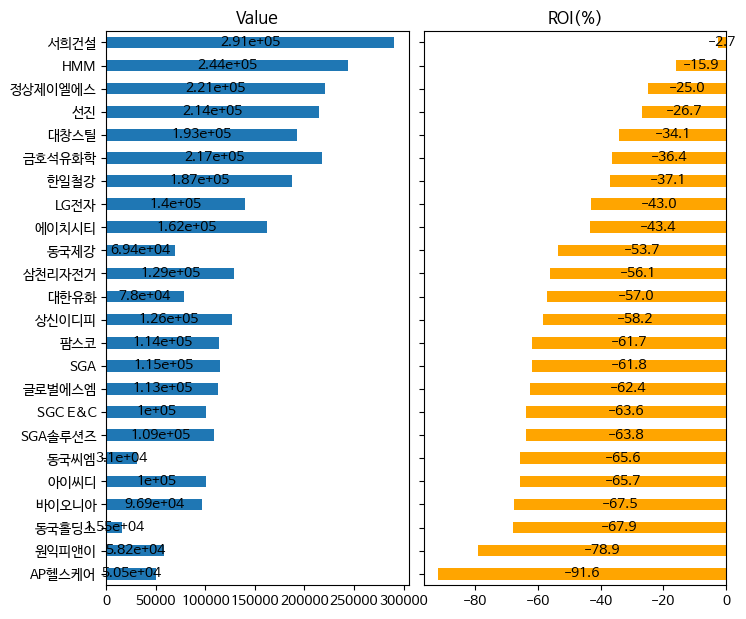

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [4]:
kw_st = dict(
    #security_names = fund_names
)

In [5]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

24 securities from 2023-03-29 to 2025-06-05 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_tdf_static_250421.csv loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [17]:
#pf_tdf.check_universe()

In [18]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

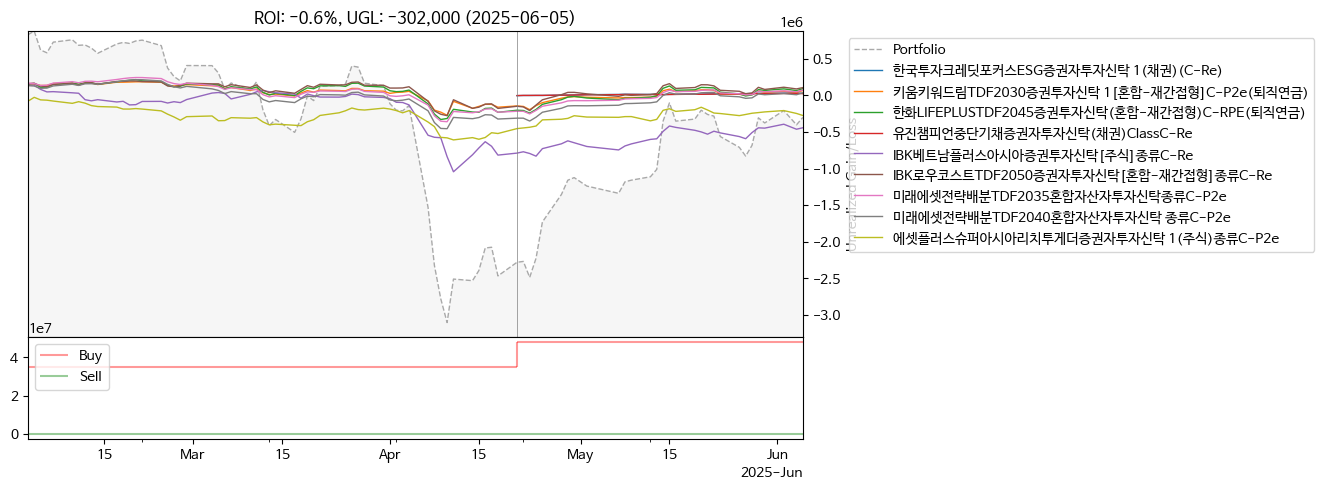

In [6]:
start = '2025-02-01'
pf_tdf.plot(start, total=False, roi=False)

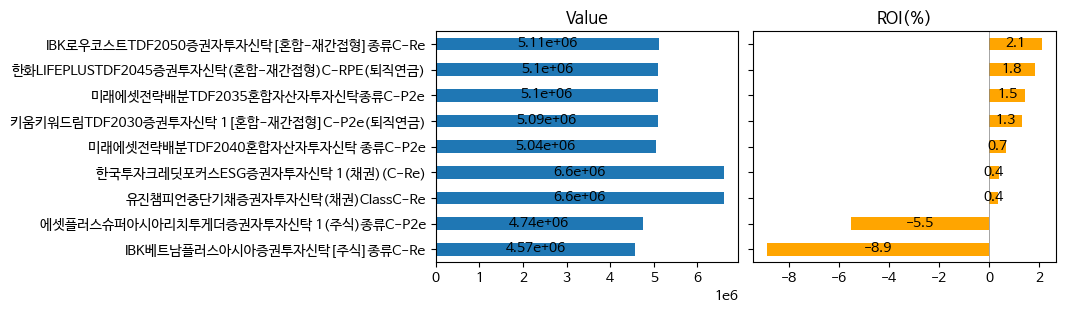

In [7]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [141]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-05-08, 48148612, -102860, 47070927, -1180545, -0.0245


start    2024-06-19
end      2025-05-08
buy      48,148,612
sell       -102,860
value    47,070,927
ugl      -1,180,545
roi         -0.0245
dtype: object

In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [55]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-05-02 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-05-02 K55101BV9571     -1346266  5242850  0.1111    0.111 2025-05-02  
           K55206C95800       116263  5242850  0.1111    0.111 2025-05-02  
           K55213C50702       253272  5242850  0.1111    0.111 2025-05-02  
           K55214CD4825     -1341987  5242850  0.1111    0.111 2025-05-02  
           K55234BY9966       892520  5242850  0.1111    0.111 2025-05-02  
           K55234DF3150       207500  5242850  0.1111    0.111 2025-05-02  
           K55301BU6139       209773  5242850  0.1111    0.111 2025-05-02  
           K55301BU6253       361393  5242850  0.1111    0.111 2025-05-02  
           K55364CF7048       490383  5242850  0.1111    0.111 2025-05-02

## HANA

In [28]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [29]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

24 securities from 2023-03-29 to 2025-06-02 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [15]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

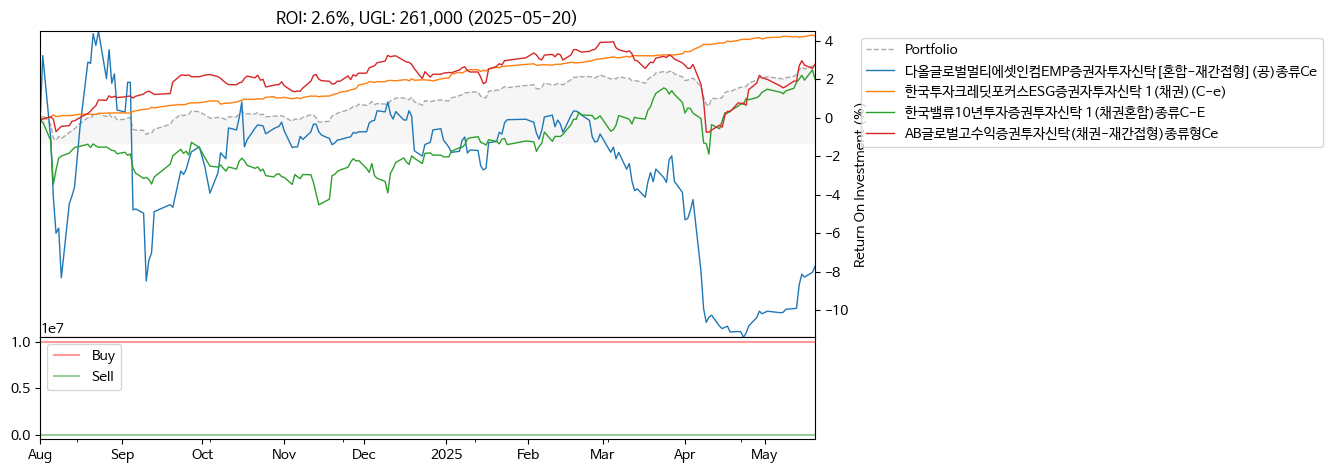

In [16]:
pf_hana.plot(total=False, roi=True)

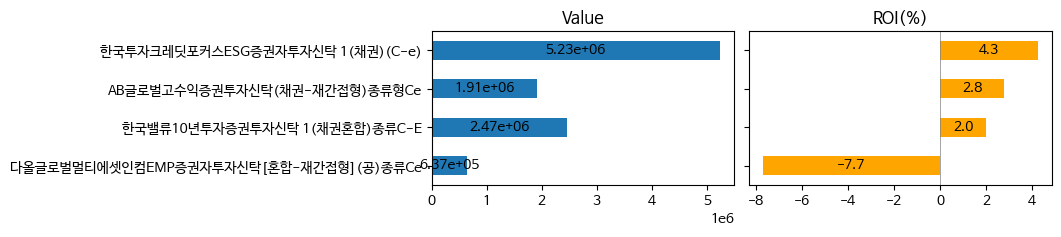

In [17]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [30]:
pf = 'SAVE_2503'

In [31]:
kw_st = dict(
    #security_names = fund_names
)

In [32]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

24 securities from 2023-03-29 to 2025-06-02 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [7]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

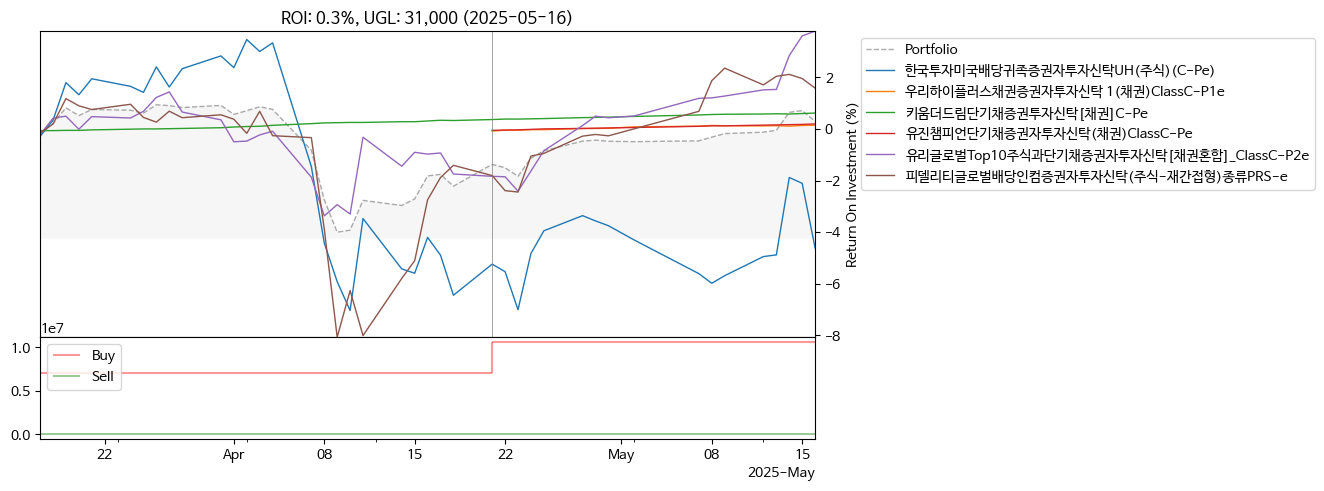

In [8]:
pf_save.plot(total=False, roi=True)

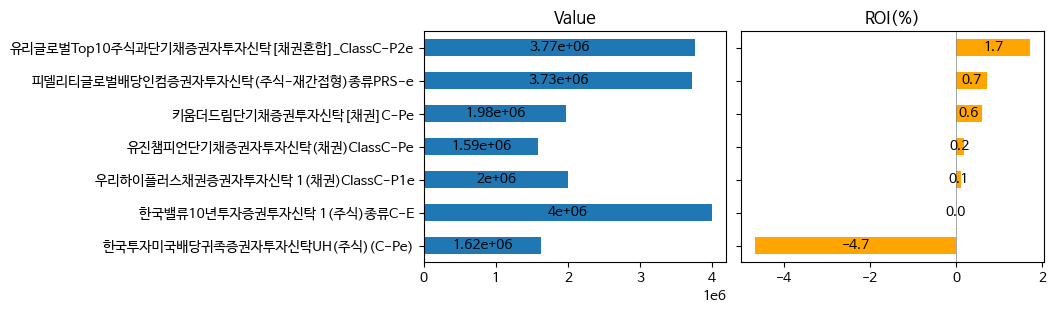

In [16]:
_ = pf_save.plot_assets(figsize=(8,3))

In [37]:
date = None
#pf_save.valuate(date, print_msg=True, join_str=True)
pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
K55307DH1659,유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e,2025-03-17,2025-06-02,1700000.0,-1040.020338,1769143,68102.979662,0.040061
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,2025-03-17,2025-06-02,1700000.0,-745.385119,1755136,54390.614881,0.031994
K55206C11278,키움더드림단기채증권투자신탁[채권]C-Pe,2025-03-17,2025-06-02,1967714.0,-349.523377,1984048,15984.476623,0.008123
K55107BU0252,우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e,2025-04-21,2025-06-02,2000000.0,0.000000,2006708,6708.000000,0.003354
K55214B30803,유진챔피언단기채증권자투자신탁(채권)ClassC-Pe,2025-04-21,2025-06-02,1584916.0,0.000000,1590749,5833.000000,0.003680
K55101D20874,한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe),2025-03-17,2025-06-02,1700000.0,-1346.100104,1620445,-80901.100104,-0.047589


In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-06-18'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    #buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'KR5236AS4818':4e6},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-05-16
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.1%, UGL: 27,901 (2025-05-16)


In [13]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [15]:
pf_save.view_record()

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-05-16 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           KR5236AS4818                한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17  
2025-05-16 K55101D20874            0  1626497    0.25    0.087 2024-06-18  
           K55107BU0252            0  2004546     NaN    0.107 2024-06-18  
           K55206C11278            0  1981105    0.25    0.106 2024-06-18  
           K55214B30803            0  1588828     NaN    0.085 2024-06-18  
           K55307DH1659      2000000  3768252    0.25    0.202 2024-06-18  
           KR5235AK9808      2000000  3729644    0.25    0.199 2024-06-18  
           KR5236AS4818      4000000  4000000     NaN    0.214 2025-05-16

## FISA

In [19]:
kw_st = dict(
    method_select = 'selected'    
)

In [21]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

24 securities from 2023-03-29 to 2025-06-04 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_fisa_static_250604.csv loaded


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

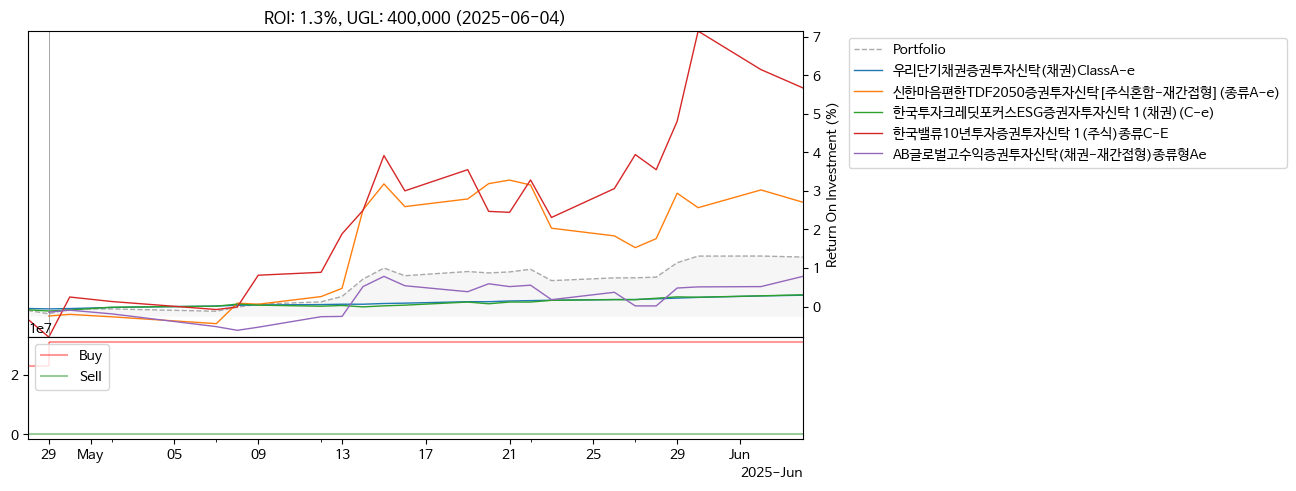

In [22]:
pf_fisa.plot(total=False, roi=True)

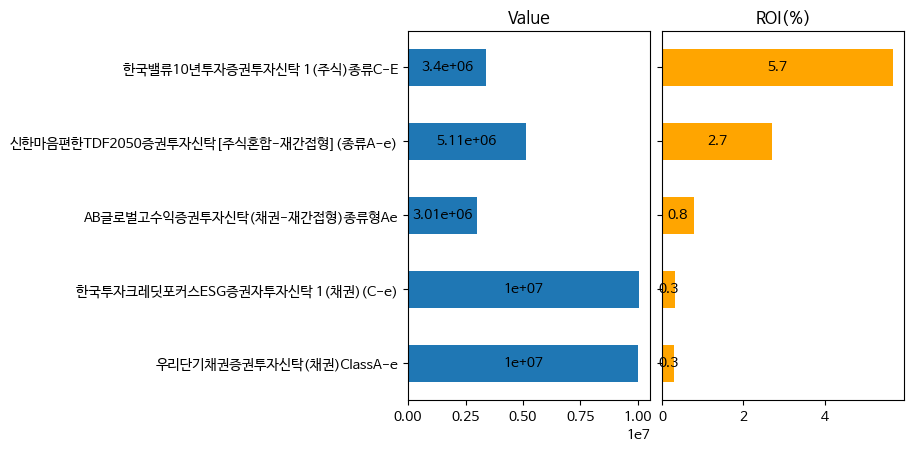

In [23]:
_ = pf_fisa.plot_assets(roi=True)

In [14]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-06-04, 30960600, -251.0, 31375223, 414372, 0.0134


start    2025-04-28
end      2025-06-04
buy      30,960,600
sell         -251.0
value    31,375,223
ugl         414,372
roi          0.0134
dtype: object

In [15]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
date_actual='2024-06-02'

# new buy
#tickers = ['K55210CO3737','KR5370AP9949']
#capital = [5e6, 3e6]
#capital = dict(zip(tickers, capital))

capital = {'KR5236AS4818': 215435}

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-04
All transactions saved to pf_fisa_static_250604.csv
ROI: 1.3%, UGL: 400,470 (2025-06-04)


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25  
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

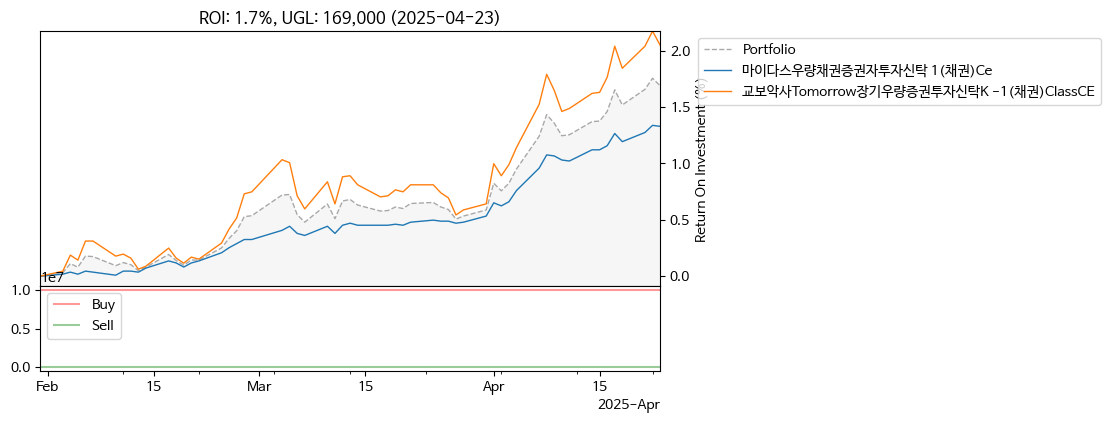

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

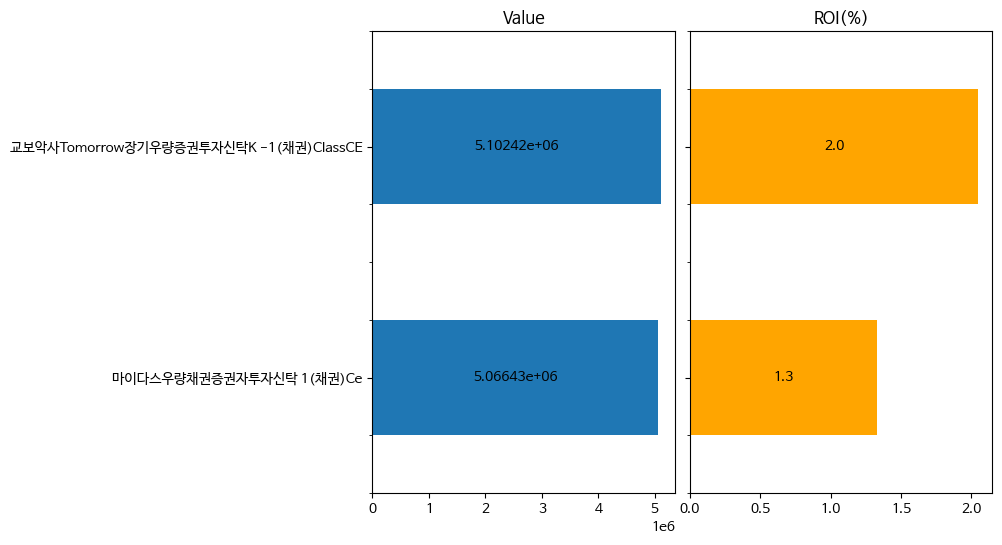

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [76]:
k200 = PM.create_universe('UV_K200')

kw = dict(
    file='pf_sds_static',
    df_universe=k200.df_prices,
    security_names=k200.get_names(),
    cost = PM.get_cost(universe, file=file_cost, path=path_tran)
)
pf_sds = PM.create_portfolio('WTR_2407', **kw)

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_sds_static_250609.csv loaded


In [12]:
from pf_utils import PortfolioBuilder as PB

universe = 'UV_K200'
k200 = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

kwargs = dict(
    file='pf_sds_static',
    path=path_tran,
    method_select='Selected',
    method_weigh='equally',
    security_names=k200.get_names(),
    cost = cost
)
pf_sds = PB(k200.df_prices, **kwargs)

200 securities from 2022-01-03 to 2025-06-09 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_sds_static_250609.csv loaded


In [13]:
from pf_utils import PortfolioBuilder as PB

universe = 'UV_K200'
k200 = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

kwargs = dict(
    file='pf_sds_static',
    path=path_tran,
    method_select='Selected',
    method_weigh='equally',
    security_names=k200.get_names(),
    cost = cost
)
pf_sds = PB(k200.df_prices, **kwargs)

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_sds_static_250609.csv loaded


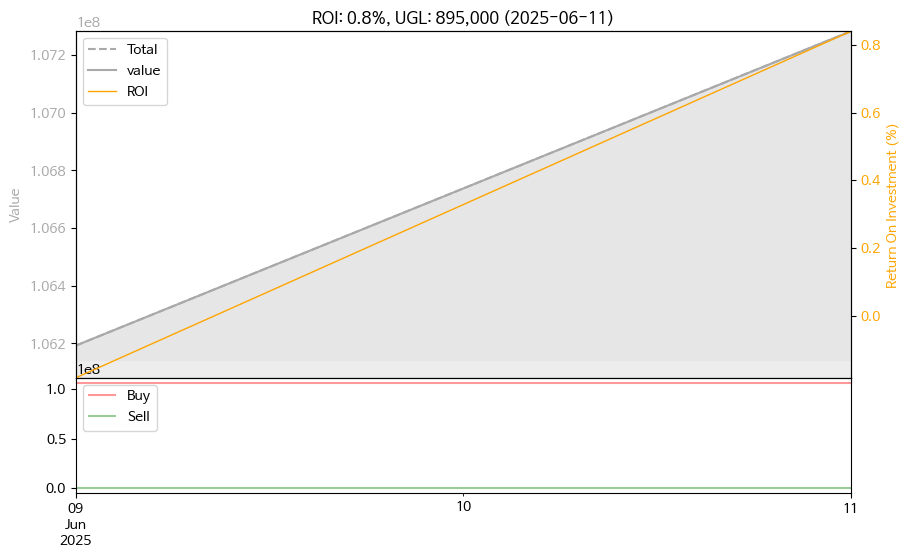

In [72]:
pf_sds.plot()

In [62]:
pf_sds.valuate()

start     2025-06-09
end       2025-06-11
buy      106,388,128
sell             0.0
value    107,282,704
ugl          894,576
roi          0.00841
dtype: object

In [63]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [69]:
date_actual = '2025-01-01'
kw = dict(
    buy = {'018260': 106392000}, 
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual = date_actual,
)
_ = pf_sds.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-11
Set save=True to save transaction record
ROI: 0.3%, UGL: 699,198 (2025-06-11)


In [80]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = {'018260': -20000000},
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-11 to 2025-06-11
Weights of tickers determined by Specified.
Rebalancing with residual 20,000,000
Mean absolute error of weights: 0 %
Residual cash: 20,118,800
ROI: 0.8%, UGL: 895,309 (2025-06-11)
Set save=True to save transaction record


In [81]:
pf_sds.view_record(-2, nshares=False)

,,name,ratio,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-09,018260,삼성에스디에스,1,106392000,106392000,1.0,1.0,2015-01-01
2025-06-11,018260,삼성에스디에스,1,-20118800,87365200,1.0,1.0,2025-01-01


In [40]:
pf_sds.name
pf_mmt.name

'MMT_2407'

In [29]:
def test(*x):
    if not isinstance(x, list):
        print('not list')
    else:
        print("it's list")
    return x


def test2(*x):
    if isinstance(x, str):
        print("it's str")
    return x

def test3(*x):
    return print(type(x))

test3('a', 1, 2)

<class 'tuple'>


In [23]:
test(1,2,3)

not list


(1, 2, 3)

In [27]:
type(('a',))

tuple

In [17]:
_ = pf_per.transaction_halt(halt=None) 
pf_per.view_record(-1, nshares=True)

Updated with transaction on 2025-06-11
Set save=True to save transaction record
ROI: 13.5%, UGL: 1,647,997 (2025-06-11)


name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-06-11 000270       기아   96900            0    5    0.05    0.043   
           001450     현대해상   25150            0   17    0.05    0.038   
           003030   세아제강지주  236000            0    2    0.05    0.042   
           005380      현대차  201000            0    2    0.05    0.036   
           005830   DB손해보험  111700            0    4    0.05    0.040   
           005850      에스엘   32400            0   16    0.05    0.046   
           009900     명신산업     610            0  500    0.05    0.027   
           009970  영원무역홀딩스  128400            0    5    0.05    0.057   
           010060   OCI홀딩스   80400            0    8    0.05    0.057   
           016380     KG스틸     985            0  495    0.05    0.043   
           017800   현대엘리베이   78600            0    9    0.05    0.063   
           024110     기업은행   16790            0   35    0.05    0.052   
           047040     대우건설    4440            0  140    0.05    0.055   
           078930       GS   47150            0   12    0.05    0.050   
           088350     한화생명    3180            0  180    0.05    0.051   
           111770     영원무역   60800            0   12    0.05    0.065   
           138930  BNK금융지주   11710            0   55    0.05    0.057   
           139130  DGB금융지주   11520            0   63    0.05    0.064   
           241560     두산밥캣   51100            0   13    0.05    0.059   
           316140   우리금융지주   20450            0   32    0.05    0.058   

                       date*  
date       ticker             
2025-06-11 000270 2025-06-11  
           001450 2025-06-11  
           003030 2025-06-11  
           005380 2025-06-11  
           005830 2025-06-11  
           005850 2025-06-11  
           009900 2025-06-11  
           009970 2025-06-11  
           010060 2025-06-11  
           016380 2025-06-11  
           017800 2025-06-11  
           024110 2025-06-11  
           047040 2025-06-11  
           078930 2025-06-11  
           088350 2025-06-11  
           111770 2025-06-11  
           138930 2025-06-11  
           139130 2025-06-11  
           241560 2025-06-11  
           316140 2025-06-11

In [10]:
pf_per.valuate()

start    2024-10-17
end      2025-06-11
buy      16,472,520
sell      2,617,050
value    18,419,529
ugl       4,564,059
roi           0.277
dtype: object

In [11]:
_ = pf_per.transaction_halt(halt=['017800']) 
pf_per.valuate()

Trading of assets 017800 to halt
Updated with transaction on 2025-06-11
Set save=True to save transaction record
ROI: 11.5%, UGL: 1,358,607 (2025-06-11)


start    2024-10-17
end      2025-06-11
buy      11,832,689
sell      2,617,050
value    10,574,246
ugl       1,358,607
roi           0.115
dtype: object

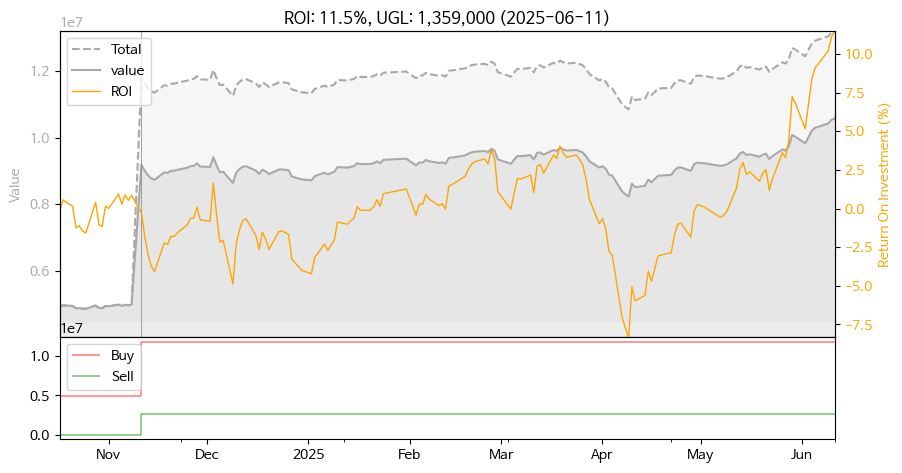

In [12]:
pf_per.plot()

## testing

In [5]:
pfs = ['MMT']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-06-12 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded



In [8]:
pf_sds.name = None

In [9]:
#pm.load('LIQ')
#pm.load('SRT')
pm.load(pf_sds)

Portfolio: imported


In [10]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,MMT_2407,Portfolio,SDS,TOTAL
start,2024-07-22,2025-01-02,2025-01-02,2024-07-22
end,2025-06-12,2025-06-12,2025-06-12,2025-06-12
buy,"61,756,350","97,106,466","97,106,466","255,969,281"
sell,"46,784,778",0.0,0.0,"46,784,778"
value,"19,685,268","107,905,536","107,905,536","235,496,340"
ugl,"4,713,695","10,799,070","10,799,070","26,311,836"
roi,0.0763,0.111,0.111,0.103


In [12]:
pf_sds.name

'SDS'

ERROR: Missing cost data for 1 tickers


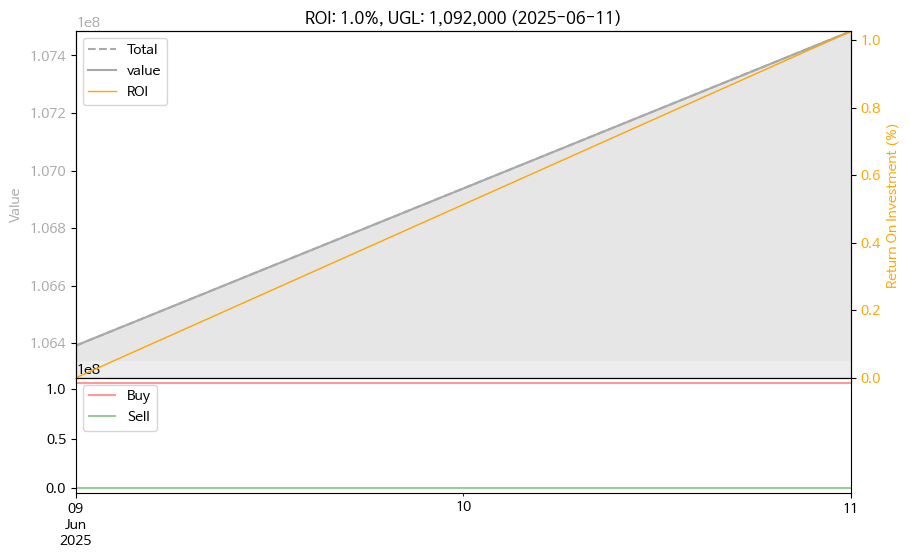

In [16]:
pf_sds.plot()

In [15]:
from pf_utils import PortfolioData
pfd = PortfolioData()
pfd.review_portfolio('MMT_2407', strategy=False, universe=False)

{'strategy': 'MMT',
 'universe': 'UV_K200',
 'file': 'pf_k200_momentum',
 'path': 'transaction'}

In [22]:
from pf_utils import PortfolioBuilder
isinstance(pf_sds, PortfolioBuilder)

True

In [20]:
PM

pf_utils.PortfolioManager

In [21]:
pf_sds

In [23]:
def add_suffx(s: str, existing_list: list) -> str:
    """
    Returns `s` with the next available numeric suffix if `s` or its numbered versions exist in `existing_list`.

    Args:
        s (str): The base string.
        existing_list (list): List of existing strings.

    Returns:
        str: `s` or `sN` where N is the next available integer suffix.
    """
    # Match s or s1, s2, etc.
    pattern = re.compile(rf"^{re.escape(s)}(\d*)$")
    max_suffix = 0

    for item in existing_list:
        match = pattern.match(item)
        if match:
            suffix = match.group(1)
            if suffix == "":
                max_suffix = max(max_suffix, 1)
            else:
                max_suffix = max(max_suffix, int(suffix) + 1)

    return f"{s}{max_suffix}" if max_suffix > 0 else s

In [25]:
import re
add_number('a', ['a', 'b', 'c', 'a2'])

'a3'

## testing

In [59]:
pf_per.transaction_halt(halt=['017800']) 

security_names updated
Data of tickers 009900, 016380 downloaded
Trading of assets 017800 to halt
Updated with transaction on 2025-06-11
Set save=True to save transaction record
ROI: 11.5%, UGL: 1,358,607 (2025-06-11)


name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-10-17 003030       세아제강지주  0.995439       986700   986700    0.20   
           009970      영원무역홀딩스  1.006742       979000   979000    0.20   
           010060       OCI홀딩스  0.992504       933800   933800    0.20   
           016380         KG스틸  0.986364      1016400  1016400    0.20   
           047040         대우건설  1.000000      1019940  1019940    0.20   
2024-11-11 000270           기아  1.010684       468000   468000    0.05   
           001450         현대해상  1.000000       505750   505750    0.05   
           003030       세아제강지주  0.994309      -773200   386600    0.05   
           005380          현대차  1.007160       419000   419000    0.05   
           005830       DB손해보험  1.016838       427600   427600    0.05   
           005850          에스엘  1.014354       501600   501600    0.05   
           009900         명신산업  1.008715       495720   495720    0.05   
           009970      영원무역홀딩스  0.997666      -514200   428500    0.05   
           010060       OCI홀딩스  1.006689      -358800   478400    0.05   
           016380         KG스틸  1.001517      -514020   500840    0.05   
           024110         기업은행  1.002059       509950   509950    0.05   
           047040         대우건설  0.993122      -461645   508900    0.05   
           078930           GS  1.002404       499200   499200    0.05   
           088350         한화생명  1.001745       515700   515700    0.05   
           111770         영원무역  0.996264       481800   481800    0.05   
           138930      BNK금융지주  1.003181       518650   518650    0.05   
           139130      DGB금융지주  1.004848       519750   519750    0.05   
           241560         두산밥캣  0.995000       520000   520000    0.05   
           316140       우리금융지주  1.001244       514560   514560    0.05   
           HLT_017800   현대엘리베이  1.081897      4640000  4640000     NaN   
2025-06-11 000270           기아  1.000000            0   484500    0.05   
           001450         현대해상  1.000000            0   427550    0.05   
           003030       세아제강지주  1.000000            0   472000    0.05   
           005380          현대차  1.000000            0   402000    0.05   
           005830       DB손해보험  1.000000            0   446800    0.05   
           005850          에스엘  1.000000            0   518400    0.05   
           009900         명신산업  1.000000            0   304919    0.05   
           009970      영원무역홀딩스  1.000000            0   641999    0.05   
           010060       OCI홀딩스  1.000000            0   643200    0.05   
           016380         KG스틸  1.000000            0   487160    0.05   
           024110         기업은행  1.000000            0   587650    0.05   
           047040         대우건설  1.000000            0   621600    0.05   
           078930           GS  1.000000            0   565800    0.05   
           088350         한화생명  1.000000            0   572400    0.05   
           111770         영원무역  1.000000            0   729599    0.05   
           138930      BNK금융지주  1.000000            0   644050    0.05   
           139130      DGB금융지주  1.000000            0   725760    0.05   
           241560         두산밥캣  1.000000            0   664300    0.05   
           316140       우리금융지주  1.000000            0   654400    0.05   
           HLT_017800   현대엘리베이  1.000000            0  4640000     NaN   

                           date*  price  
date       ticker                        
2024-10-17 003030     2024-10-17    NaN  
           009970     2024-10-17    NaN  
           010060     2024-10-17    NaN  
           016380     2024-10-17    NaN  
           047040     2024-10-17    NaN  
2024-11-11 000270     2024-11-11    NaN  
           001450     2024-11-11    NaN  
           003030     2024-11-11    NaN  
           005380     2024-11-11    NaN  
           005830     2024-11-11    NaN  
           005850     2024-11-11    NaN  
 

In [210]:
#pf, date_actual = 'PER_2410', '2025-11-12'
pf, date_actual = 'PER_2505', '2026-05-12'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per2_250509.csv loaded


In [201]:
pf_per.transaction_halt(halt=['015760']) 

security_names updated
Data of tickers 009900, 016380 downloaded
ERROR: Check 015760 to halt in the latest transaction
Updated with transaction on 2025-06-11
Set save=True to save transaction record
ROI: 27.7%, UGL: 4,564,056 (2025-06-11)


name     ratio  transaction      net  weight      date*  \
date       ticker                                                               
2024-10-17 003030   세아제강지주  0.995439       986700   986700    0.20 2024-10-17   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20 2024-10-17   
           010060   OCI홀딩스  0.992504       933800   933800    0.20 2024-10-17   
           016380     KG스틸  0.986364      1016400  1016400    0.20 2024-10-17   
           047040     대우건설  1.000000      1019940  1019940    0.20 2024-10-17   
2024-11-11 000270       기아  1.010684       468000   468000    0.05 2024-11-11   
           001450     현대해상  1.000000       505750   505750    0.05 2024-11-11   
           003030   세아제강지주  0.994309      -773200   386600    0.05 2024-11-11   
           005380      현대차  1.007160       419000   419000    0.05 2024-11-11   
           005830   DB손해보험  1.016838       427600   427600    0.05 2024-11-11   
           005850      에스엘  1.014354       501600   501600    0.05 2024-11-11   
           009900     명신산업  1.008715       495720   495720    0.05 2024-11-11   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05 2024-11-11   
           010060   OCI홀딩스  1.006689      -358800   478400    0.05 2024-11-11   
           016380     KG스틸  1.001517      -514020   500840    0.05 2024-11-11   
           017800   현대엘리베이  1.081897      4640000  4640000     NaN 2024-11-11   
           024110     기업은행  1.002059       509950   509950    0.05 2024-11-11   
           047040     대우건설  0.993122      -461645   508900    0.05 2024-11-11   
           078930       GS  1.002404       499200   499200    0.05 2024-11-11   
           088350     한화생명  1.001745       515700   515700    0.05 2024-11-11   
           111770     영원무역  0.996264       481800   481800    0.05 2024-11-11   
           138930  BNK금융지주  1.003181       518650   518650    0.05 2024-11-11   
           139130  DGB금융지주  1.004848       519750   519750    0.05 2024-11-11   
           241560     두산밥캣  0.995000       520000   520000    0.05 2024-11-11   
           316140   우리금융지주  1.001244       514560   514560    0.05 2024-11-11   
2025-06-11 000270       기아  1.000000            0   484500    0.05 2025-06-11   
           001450     현대해상  1.000000            0   427550    0.05 2025-06-11   
           003030   세아제강지주  1.000000            0   472000    0.05 2025-06-11   
           005380      현대차  1.000000            0   402000    0.05 2025-06-11   
           005830   DB손해보험  1.000000            0   446800    0.05 2025-06-11   
           005850      에스엘  1.000000            0   518400    0.05 2025-06-11   
           009900     명신산업  1.000000            0   304919    0.05 2025-06-11   
           009970  영원무역홀딩스  1.000000            0   641999    0.05 2025-06-11   
           010060   OCI홀딩스  1.000000            0   643200    0.05 2025-06-11   
           016380     KG스틸  1.000000            0   487160    0.05 2025-06-11   
           017800   현대엘리베이  1.000000            0  7860000     NaN 2025-06-11   
           024110     기업은행  1.000000            0   587650    0.05 2025-06-11   
           047040     대우건설  1.000000            0   621600    0.05 2025-06-11   
           078930       GS  1.000000            0   565800    0.05 2025-06-11   
           088350     한화생명  1.000000            0   572400    0.05 2025-06-11   
           111770     영원무역  1.000000            0   729599    0.05 2025-06-11   
           138930  BNK금융지주  1.000000            0   644050    0.05 2025-06-11   
           139130  DGB금융지주  1.000000            0   725760    0.05 2025-06-11   
           241560     두산밥캣  1.000000            0   664300    0.05 2025-06-11   
           316140   우리금융지주  1.000000            0   654400    0.05 2025-06-11   

                   price  
date       ticker         
2024-10-17 003030    NaN  
           009970    NaN  
           010060    NaN  
           016380    NaN  
           047040    NaN  
2024-11-11 000270    NaN 

In [211]:
def transaction_halt(self, date=None, save=False, **kw_halt):
    """
    create transaction with TradingHalts instance
    kw_halt: kwargs for tradinghalts.transaction
    """
    record = self.record
    if record is None:
        # run transaction_pipeline if first transaction with buy only
        if 'buy' in kw_halt and {'sell', 'resume', 'halt'}.isdisjoint(kw_halt):
            kw = dict(
                capital = kw_halt['buy'],
                date_actual = kw_halt.pop('date_actual', None)
            )
            return self.transaction_pipeline(date=date, save=save, nshares=False, **kw)
        else:
            return print('ERROR: No transaction record exits')
    else:
        self.df_rec = None # reset prv transaction if any

    date = self._get_data(0, 0, date=date).index.max()
    # get values of assets on the date for tradinghalts
    sr_net = self.valuate(total=False, date=date, exclude_cost=True, int_to_str=False)
    sr_net = sr_net['value']

    return date, self.date_format, sr_net, kw_halt
    
    recs = self.tradinghalts.transaction(date, date_format=self.date_format, 
                                         values_on_date=sr_net, **kw_halt) 
    if recs is not None: # new transaction created
        df_rec, record_halt = recs
        df_rec = self._update_ticker_name(df_rec) # update name for buy case.
        # save before recover
        self.df_rec = df_rec
        # recover record with halt before saving or converting to record with num of shares
        return df_rec, record_halt
        df_rec = self.tradinghalts.recover(df_rec, record_halt)
        if save:
            self.save_transaction(df_rec) # where self.record updated
        else:
            print('Set save=True to save transaction record')
        _ = self.valuate(total=True, int_to_str=True, print_summary_only=True)
        return df_rec
    else:
        return print('Nothing to save')

In [99]:
#transaction_halt(pf_per, halt=['015760'])

In [107]:
def recover(self, record, record_halt):
    """
    add to record the transaction of tickres to halt 
    record: record with new transaction
    """
    if record_halt is None:
        return record
    
    date_lt = self.date_lt
    cols_record = self.cols_record
    col_date = cols_record['date']
    # get new transaction date before concat
    date_nt = record.index.get_level_values(col_date).max()
    # concat record with halt in kept
    record = pd.concat([record, record_halt])
    if date_nt > date_lt:
        col_tkr = cols_record['tkr']
        col_name = cols_record['name']
        col_net = cols_record['net']
        col_trs = cols_record['trs']
        col_rat = cols_record['rat']
        col_dttr = cols_record['dttr']
        # copy record_halt on date_lt to new transaction date
        kw = {col_date:date_nt, col_trs:0, col_rat:1, col_dttr:date_nt}

        return record_halt, date_lt
        
        record_halt_new = (record_halt.loc[date_lt, [col_name, col_net]].assign(**kw)
                           .set_index(col_date, append=True).reorder_levels([col_date, col_tkr]))
        record = pd.concat([record, record_halt_new])
    return record.sort_index()

In [105]:
res = transaction_halt(pf_per, halt=['015760'])
df_rec, record_halt = res
pf_per.tradinghalts.recover(df_rec, record_halt)

Trading of assets 015760 to halt
Updated with transaction on 2025-06-11


KeyError: Timestamp('2025-05-09 00:00:00')

In [137]:
#res = transaction_halt(pf_per, halt=['017800'])
res = transaction_halt(pf_per, halt=['015760'])
df_rec, record_halt = res
#df_rec = pf_per.tradinghalts.recover(df_rec, record_halt)

import pandas as pd
res = recover(pf_per.tradinghalts, df_rec, record_halt)
record_halt, date_lt = res

security_names updated
Data of tickers 009900, 016380 downloaded


ValueError: too many values to unpack (expected 2)

In [112]:
record_halt

,name,ratio,transaction,net,weight,date*,price


In [212]:
def transaction(self, date, buy=None, sell=None, resume=None, halt=None, 
                date_actual=None, values_on_date=None, date_format='%Y-%m-%d'):
    """
    make new transaction from the latest transaction without price data
    buy: dict of tickers to total buy price
    halt: list of tickers to halt
    sell: dict of tickers to total sell price or list 
    resume: dict, list, 'all' 
    values_on_date: dict/series of asset to value on the new transaction date
    """
    record = None if self.record is None else self.record.copy()
    if record is None:
        return print('REMINDER: No record to start with')
    else:
        record_halt = None if self.record_halt is None else self.record_halt.copy()

    date_lt = self.date_lt
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_rat = cols_record['rat']
    col_dttr = cols_record['dttr']
    idx = pd.IndexSlice
    print_reminder = lambda x: print(f'REMINDER: For the {x} price, use the total amount, not the unit price.')

    # set transaction date
    date = pd.to_datetime(date)
    if date <= date_lt:
        dt1, dt2 = [x.strftime(date_format) for x in [date, date_lt]]
        return print(f'ERROR: set date ({dt1}) after the latest transaction date {dt2}')

    # move tickers to sell first to record if in record_halt 
    if sell is not None: 
        tickers = sell.keys() if isinstance(sell, dict) else sell
        record, record_halt = self._free_halt(tickers, record, record_halt, msg=False)

    # update record for resume
    if resume is not None:
        if resume == 'all':
            tickers = None # resume all in halt
            resume = None # set to None to skip later net update
        else:
            if isinstance(resume, list):
                tickers = resume
                resume = None # set to None to skip later update
            else:
                tickers = resume.keys()
        record, record_halt = self._free_halt(tickers, record, record_halt)

    # update record for halt
    if halt is not None:
        return halt, record, record_halt
        record, record_halt = self._set_to_halt(halt, record, record_halt)
        #return record, record_halt
    
    # copy record of date_lt to date
    # cast date_actual of new transaction to datetime like existing transactions 
    date_actual = date if date_actual is None else pd.to_datetime(date_actual)
    kw = {col_date:date, col_trs:0, col_rat:1, col_dttr:date_actual}
    record_date_lt = record.loc[date_lt, :]
    record_date = (record_date_lt.loc[record_date_lt[col_net] > 0].assign(**kw)
                       .set_index(col_date, append=True).reorder_levels([col_date, col_tkr]))
    
    # update value of assets on the date
    if isinstance(values_on_date, dict):
        values_on_date = pd.Series(values_on_date)
    if isinstance(values_on_date, pd.Series):
        if record_date.index.get_level_values(col_tkr).difference(values_on_date.index).size > 0:
            print('WARNING: No update of net as missing assets in values_on_date')
        else:
            values_on_date = (values_on_date.rename_axis(col_tkr).to_frame(col_net)
                              .assign(**{col_date:date}) # date is datetime
                              .set_index(col_date, append=True).swaplevel())
            record_date.update(values_on_date)
    else:
        print(f'WARNING: No update of net on {date.strftime(date_format)}')
    record = pd.concat([record, record_date]).sort_index()

    if buy is not None:
        print_reminder('buy')
        # check if assets to buy in halted
        if record_halt is not None:
            tkr = record_halt.loc[date_lt].index.map(self.toggle_prefix).intersection(buy.keys())
            if tkr.size > 0:
                return self._print_tickers(tkr, 'ERROR: Resume {} first to buy')

        # update existing assets 
        tkr = record.loc[date].index.intersection(buy.keys())
        if tkr.size > 0:
            sr_buy = pd.Series(buy).rename_axis(col_tkr)
            for x in [col_trs, col_net]:
                record.loc[idx[date, tkr], x] += sr_buy
            # remove exising assets from buy
            buy = {k:v for k,v in buy.items() if k not in tkr}

        if len(buy) > 0: # add new assets
            index = pd.MultiIndex.from_product([[date], buy.keys()], names=[col_date, col_tkr])
            kw = {col_rat:1, col_dttr:date_actual}
            df_buy = (pd.DataFrame([buy, buy], index=[col_trs, col_net]).T
                      .set_index(index).assign(**kw))
            record = pd.concat([record, df_buy])

        record = record.sort_index()

    if sell is not None:
        tkr = sell.keys() if isinstance(sell, dict) else sell
        tkr = pd.Index(tkr).difference(record.loc[date].index)
        if tkr.size > 0:
            return self._print_tickers(tkr, 'ERROR: {} to sell not in the latest transaction')
        
        if isinstance(sell, list):
            # get sell price from net if not spec after the size check
            sell = {x: record.loc[idx[date, x], col_net] for x in sell}
        else: # assuming sell is dict
            print_reminder('sell')
        index = pd.MultiIndex.from_product([[date], sell.keys()], names=[col_date, col_tkr])
        kw = {col_net:0, col_rat:1, col_dttr:date_actual}
        df_sell = (pd.DataFrame(sell, index=[col_trs]).mul(-1).T
                   .set_index(index).assign(**kw))
        record.update(df_sell, overwrite=True)

    # update net of resumed if net given in resume dict
    if resume is not None: # resume is dict
        tkr = pd.Index(resume.keys()).difference(record.loc[date].index)
        if tkr.size > 0:
            return self._print_tickers(tkr, 'ERROR: {} to resume not in the latest transaction')
        else:
            index = pd.MultiIndex.from_product([[date], resume.keys()], names=[col_date, col_tkr])
            kw = {col_trs:0, col_rat:1, col_dttr:date_actual}
            df_resume = (pd.DataFrame(resume, index=[col_net]).T
                       .set_index(index).assign(**kw))
            record.update(df_resume, overwrite=True)

    dt = date.strftime(date_format)
    print(f'Updated with transaction on {dt}')
    return (record, record_halt)


#res = transaction_halt(pf_per, halt=['017800'])
res = transaction_halt(pf_per, halt=['015760'])
#res[1]

In [213]:
date, date_format, sr_net, kw_halt = res

self = pf_per
res2 = transaction(self.tradinghalts, date, date_format=date_format, values_on_date=sr_net, **kw_halt) 

In [214]:
halt, record, record_halt = res2
#record, record_halt = self._set_to_halt(halt, record, record_halt)
#res = self._set_to_halt(halt, record, record_halt)

In [215]:
def _set_to_halt(self, tickers, record, record_halt):
    """
    move transaction history of tickers to halt from record to record_halt
    """
    prefix_halt = self.prefix_halt
    date_lt = self.date_lt
    col_tkr, col_date, col_net = [self.cols_record[x] for x in ['tkr', 'date', 'net']]
    if tickers is None: # init record_halt
        if record_halt is None: # make sure no init before
            cond = record.index.get_level_values(col_tkr).str.startswith(prefix_halt)
            if sum(cond) > 0:
                record_halt = record.loc[cond]
                record = record.loc[~cond]
                tickers = record_halt.index.get_level_values(col_tkr).unique()
                self._print_tickers(tickers, 'Trading of assets {} to halt')
    else:
        # check if all tickers in the latest transaction
        tkr_u = self._check_latest(tickers, record)
        if tkr_u.size == 0:
            # check if tickers to halt in hold
            df = record.loc[date_lt].loc[tickers]
            tkr_u = df.loc[df[col_net] == 0].index
            if tkr_u.size == 0:

                return tickers, record, col_date, col_tkr, col_net
                
                # get all transactions to halt
                index_halt = self._get_halt(tickers, record, col_date, col_tkr, col_net)
                
                return record, index_halt
                record_halt_new = record.loc[index_halt]
                # add prefix
                record_halt_new.index = record_halt_new.index.map(lambda x: (x[0], self.toggle_prefix(x[1])))
                if record_halt is None:
                    record_halt = record_halt_new
                else:
                    record_halt = pd.concat([record_halt, record_halt_new]).sort_index()
                record = record.drop(index_halt)
                self._print_tickers(tickers, 'Trading of assets {} to halt')
        if tkr_u.size > 0:
            self._print_tickers(tkr_u, 'ERROR: Check {} to halt in the latest transaction')
    return (record, record_halt)


self = pf_per
res3 = _set_to_halt(self.tradinghalts, halt, record, record_halt)
#res3[1]


#record, index_halt = res3
tickers, record, col_date, col_tkr, col_net = res3

In [216]:
tickers
#record

['015760']

In [217]:
def _get_halt(self, tickers, record, col_date, col_tkr, col_net):
    """
    get index of date & ticker of all transactions of tickers to halt
    """
    # Extract unique sorted dates
    dates = record.index.get_level_values(col_date).unique().sort_values()
    # Create a MultiIndex with all date-ticker combinations
    index = pd.MultiIndex.from_product([dates, tickers], names=record.index.names)

    #return dates, index
    
    # Initialize a Series with zeros and update with available values from `record`
    sr = pd.Series(0, index=index, name=col_net)
    idx = pd.IndexSlice
    sr.update(record.loc[idx[:, tickers], col_net])

    return sr, col_tkr
    
    # Identify indices where the previous value is zero
    cond = sr.groupby(col_tkr).apply(lambda x: x*x.shift(-1).ffill() > 0).droplevel(0)
    return sr.loc[cond].index



sr, col_tkr = _get_halt(pf_per.tradinghalts, tickers, record, col_date, col_tkr, col_net)
sr

date        ticker
2025-05-09  015760    2328000
Name: net, dtype: int64

In [191]:
cond = sr.groupby(col_tkr).apply(lambda x: x*x.shift(-1).ffill() > 0).droplevel(0)
sr.loc[cond].index

MultiIndex([], names=['date', 'ticker'])

In [209]:
sr.groupby(col_tkr).apply(lambda x: x*x.shift(-1).ffill() > 0 if len(x) > 1 else x)
#sr.groupby(col_tkr).apply(lambda x: len(x))

ticker  date        ticker
017800  2024-10-17  017800    False
        2024-11-11  017800     True
Name: net, dtype: bool

In [221]:
sr.groupby(col_tkr).apply(lambda x: x*x.shift(-1).ffill() > 0 if len(x) > 1 else x>0)
#sr.groupby(col_tkr).apply(lambda x: len(x))

ticker  date        ticker
015760  2025-05-09  015760    True
Name: net, dtype: bool

In [220]:
sr.groupby(col_tkr).apply(lambda x: x)

ticker  date        ticker
015760  2025-05-09  015760    2328000
Name: net, dtype: int64

In [ ]:
recs = self.tradinghalts.transaction(date, date_format=self.date_format, 
                                     values_on_date=sr_net, **kw_halt) 